In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer[1].csv to breast-cancer[1].csv


In [3]:
df = pd.read_csv("breast-cancer[1].csv")
print(df.shape)
print(df.head())
print(df.columns)
print(df["diagnosis"].value_counts())


(569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst

In [4]:
X = df.drop(["diagnosis", "Id"], axis=1, errors="ignore")
y = df["diagnosis"]

# Convert categorical target to binary
y = y.map({"M": 1, "B": 0})

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)

Train size: (455, 31)  Test size: (114, 31)


In [6]:
# Linear Kernel
svm_linear = SVC(kernel="linear", C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# RBF Kernel
svm_rbf = SVC(kernel="rbf", C=1, gamma="scale")
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluating both
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))


Linear SVM Accuracy: 0.9649122807017544
RBF SVM Accuracy: 0.9649122807017544


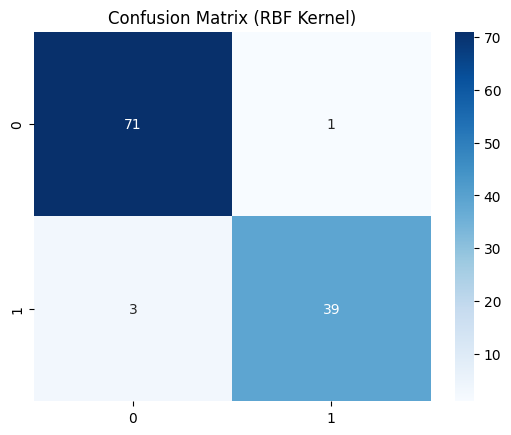


Classification Report (RBF Kernel):
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [7]:
# Confusion Matrix (RBF as example)
cm = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (RBF Kernel)")
plt.show()

print("\nClassification Report (RBF Kernel):\n", classification_report(y_test, y_pred_rbf))


In [8]:
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", 0.01, 0.1, 1],
    "kernel": ["rbf"]
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy", verbose=1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test Accuracy with Tuned Params:", accuracy_score(y_test, y_pred_best))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.9736263736263737
Test Accuracy with Tuned Params: 0.9649122807017544


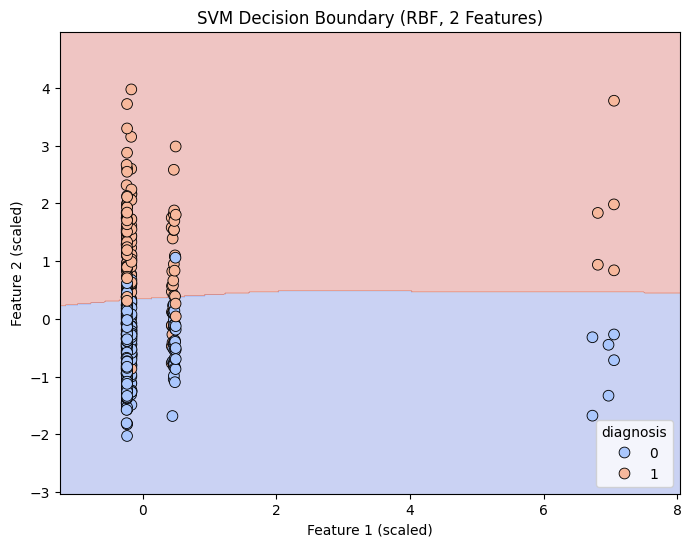

In [9]:
# Picking 2 features for visualization
X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42, stratify=y
)

svm_vis = SVC(kernel="rbf", C=1, gamma=0.1)
svm_vis.fit(X_train_vis, y_train_vis)

# Meshgrid
x_min, x_max = X_vis[:, 0].min()-1, X_vis[:, 0].max()+1
y_min, y_max = X_vis[:, 1].min()-1, X_vis[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y, palette="coolwarm", s=60, edgecolor="k")
plt.title("SVM Decision Boundary (RBF, 2 Features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()
